In [1]:
%gui qt
from mayavi import mlab

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
mlab.init_notebook(backend='x3d')

Notebook initialized with x3d backend.


# <font face="gotham" color="purple"> Visualisation of A System of Two Linear Equations 

Consider a linear system of two equations:

\begin{align}
x+y&=6\\
x-y&=-4
\end{align}
Easy to solve: $(x, y)^T = (1, 5)^T$. Let's plot the linear system.

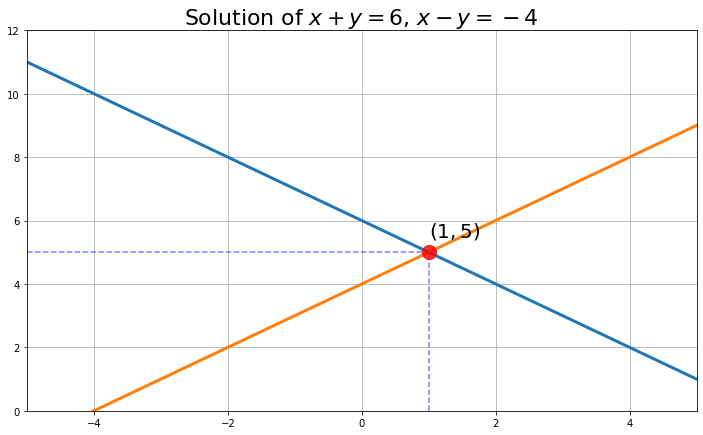

In [5]:
x = np.linspace(-5, 5, 100)
y1 = -x + 6
y2 = x + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8) 
ax.plot(x, y1, x, y2, lw = 3)
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x+y=6$, $x-y=-4$', size = 22)
ax.grid()

# <font face="gotham" color="purple"> How to Draw a Plane

Before drawing a plan, let's refresh about the logics of Matplotlib 3D plotting. This should be familiar to you if you know about MATLAB.

In [6]:
x, y = [-1, 0, 1], [-1, 0, 1]
X, Y = np.meshgrid(x, y)

Mathematically, meshgrids are just the coordinates of <font face="gotham" color="red">Cartesian product</font>. We can plot all the coordinates of these meshgrids as well.

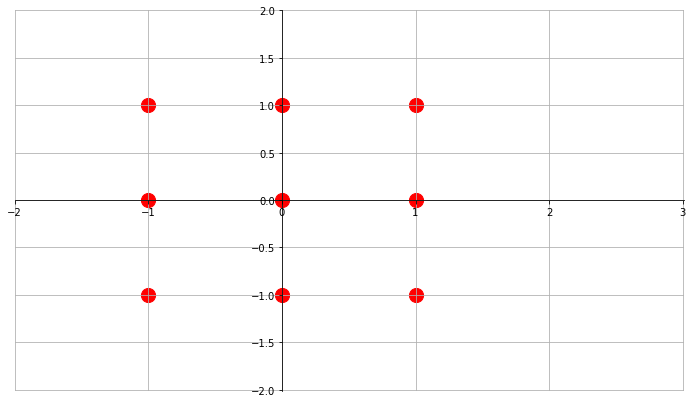

In [7]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(X, Y, s = 200, color = 'red')
ax.axis([-2, 3.01, -2.01, 2])
ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()
plt.show()

Try more of them.

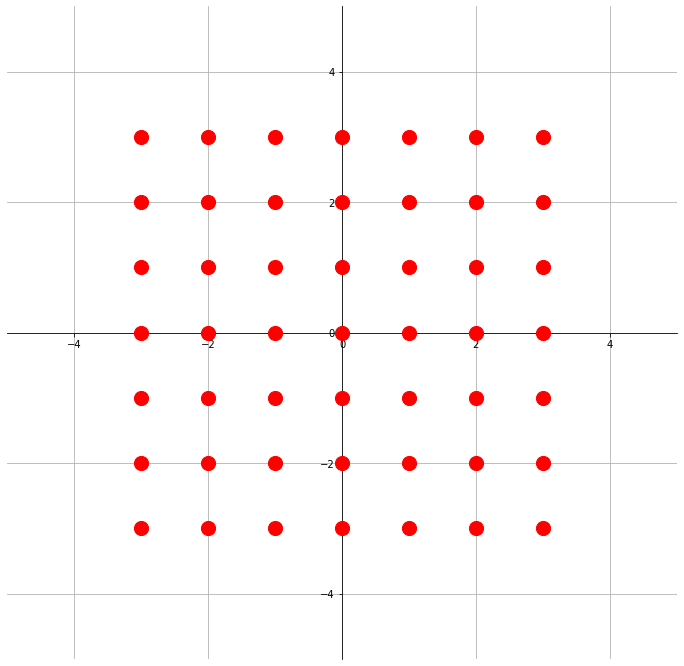

In [8]:
x, y = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(X, Y, s = 200, color = 'red', zorder = 3)
ax.axis([-5, 5, -5, 5])

ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()

Now consider the function $z = f(x, y)$, $z$ is in the $3rd$ dimension, though matplotlib is never meant for fine plotting of 3D graphics, basic 3D plotting is still acceptable. Define 

$$z= x + y$$

Then plot $z$:

<IPython.core.display.Javascript object>


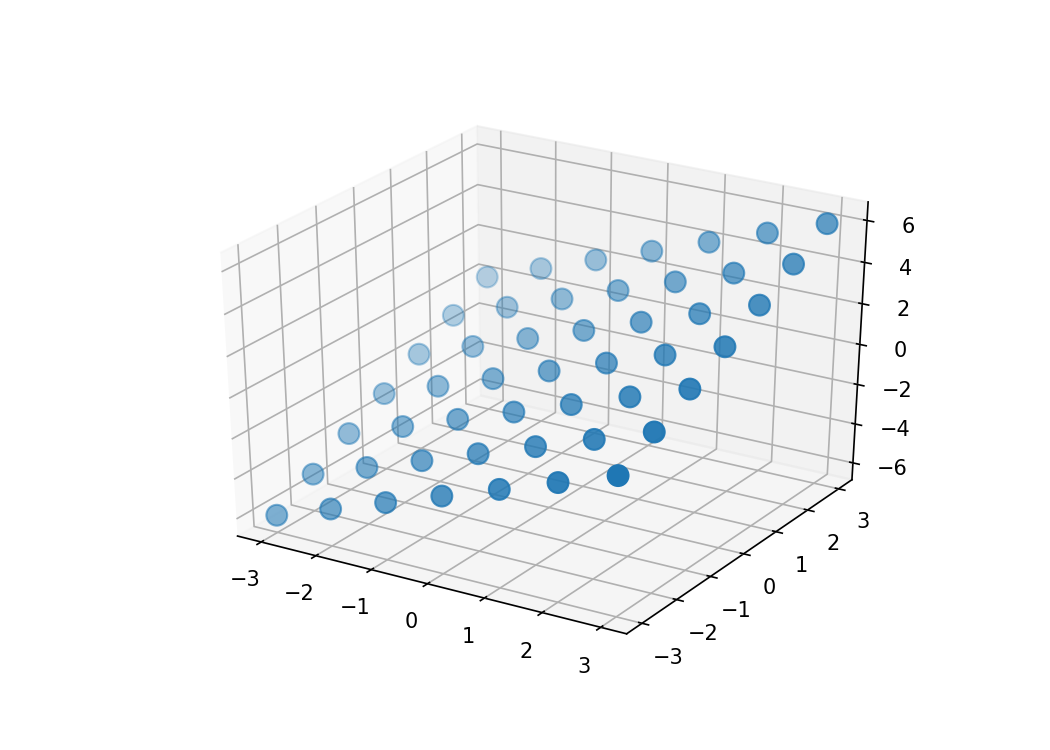

In [10]:
Z = X + Y

%matplotlib notebook
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s = 100)
plt.show()

<IPython.core.display.Javascript object>


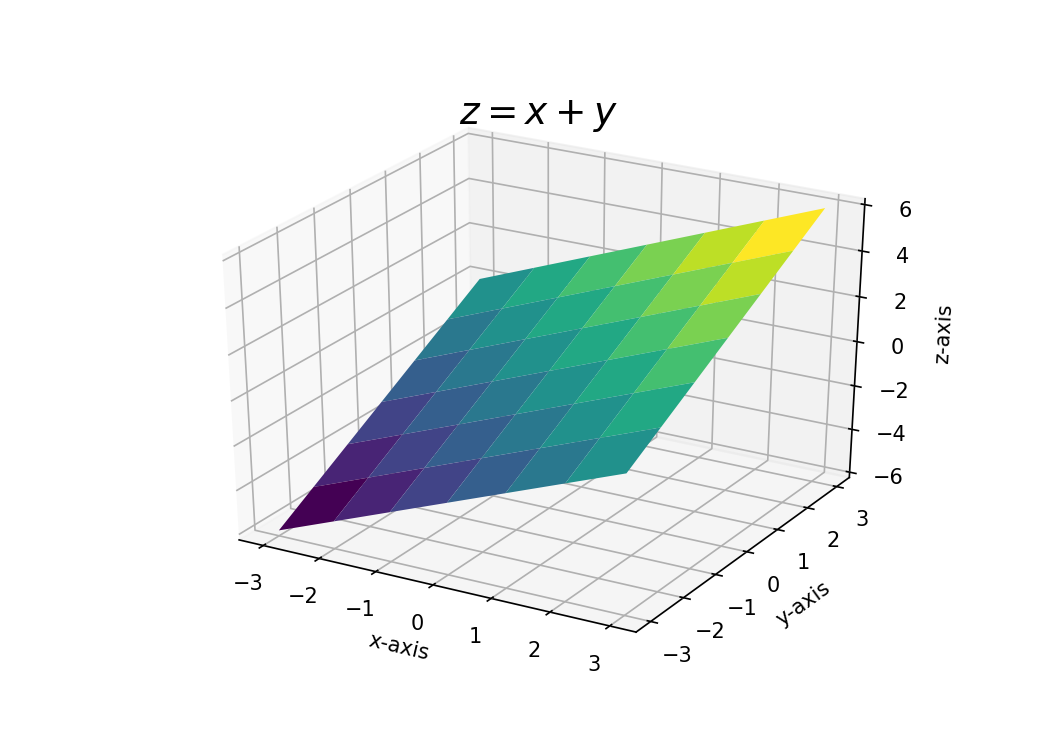

In [14]:
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap ='viridis') # MATLAB default cmap
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('$z=x+y$', size = 18)
plt.show()

# <font face="gotham" color="purple"> Visualisation of A System of Three Linear Equations 

We expand the linear system
\begin{align}
x_1- 2x_2+x_3&=0\\
2x_2-8x_3&=8\\
-4x_1+5x_2+9x_3&=-9
\end{align}
And solution is $(x_1, x_2, x_3)^T = (29, 16, 3)^T$. Let's reproduce the system visually.

<IPython.core.display.Javascript object>


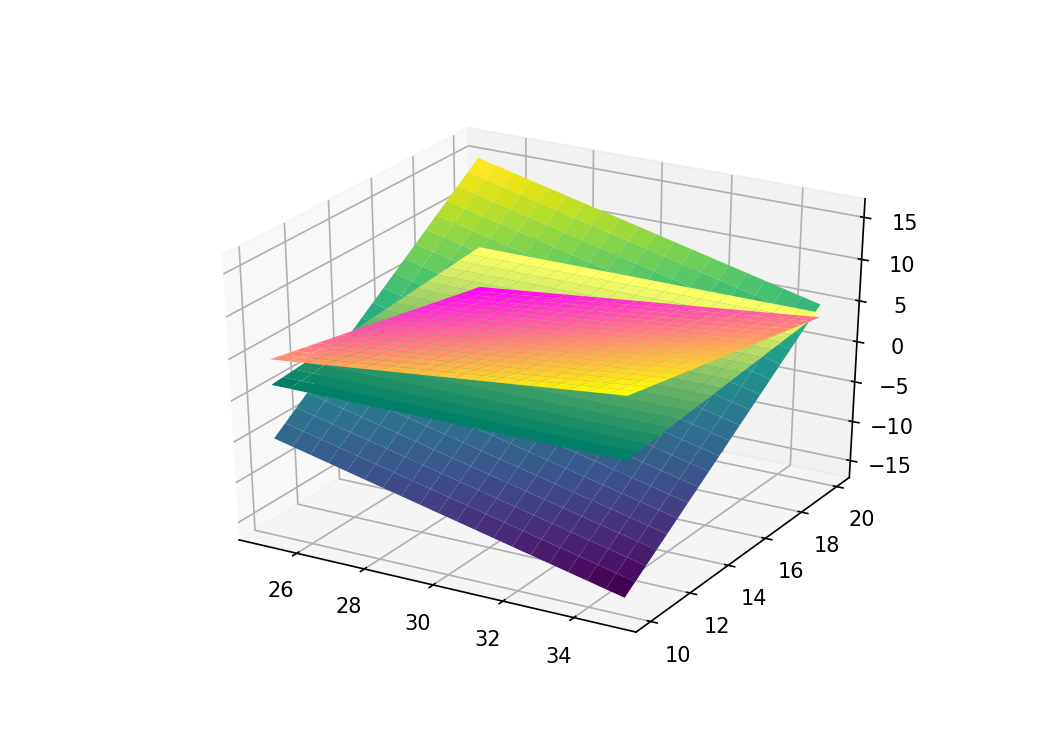

In [16]:
x1 = np.linspace(25, 35, 20)
x2 = np.linspace(10, 20, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111, projection = '3d')

X3 = 2*X2 - X1
ax.plot_surface(X1, X2, X3, cmap ='viridis', alpha = 1) 

X3 = .25*X2 - 1
ax.plot_surface(X1, X2, X3, cmap ='summer', alpha = 1)

X3 = -5/9*X2 + 4/9*X1 - 1
ax.plot_surface(X1, X2, X3, cmap ='spring', alpha = 1)

ax.scatter(29, 16, 3, s = 200, color = 'black')
plt.show()

We are sure there is solution, however the graph does not show the intersection of planes.The problem is that Matplotlib is not truly for drawing complicated 3D graphics, and it renders merely fake 3D graphs.

Mayavi is much professional in rendering 3D graphics, we will give an example here.

In [17]:
mlab.clf()
X1, X2 = np.mgrid[-10:10:21*1j, -5:10:21*1j]
X3 = 6 - X1 - X2
mlab.mesh(X1, X2, X3,colormap="spring")
X3 = 3 - 2*X1 + X2
mlab.mesh(X1, X2, X3,colormap="winter")
X3 = 3*X1 + 2*X2 -4
mlab.mesh(X1, X2, X3,colormap="summer")
mlab.axes()
mlab.outline()
mlab.points3d(1, 2, 3, color = (.8, 0.2, .2), )
mlab.title('A System of Linear Equations')

## <font face="gotham" color="purple"> Visualisation of An Inconsistent System


Now let's visualize the linear system that does not have a solution.

\begin{align}
x+y+z&=1\\
x-y-2z&=2\\
2x-z&=1
\end{align}
Rearrange the system to solve for $z$:
\begin{align}
z&=1-x-y\\
z&=\frac{x}{2}-\frac{y}{2}+1\\
z&=2x-1
\end{align}

In [18]:
mlab.clf()
X, Y = np.mgrid[-5:5:21*1j, -5:5:21*1j]
Z = 1 - X - Y
mlab.mesh(X, Y, Z,colormap="spring")

Z = X/2 - Y/2 + 1
mlab.mesh(X, Y, Z,colormap="summer")

Z = 2*X - 1
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A Inconsistent System of Linear Equations')

## <font face="gotham" color="purple"> Visualisation of A System With Infinite Numbers of Solutions

Our system of equations is given
\begin{align}
y-z=&4\\
2x+y+2z=&4\\
2x+2y+z=&8
\end{align}
Rearrange to solve for $z$
\begin{align}
z=&y-4\\
z=&2-x-\frac{y}{2}\\
z=&8-2x-2y
\end{align}

In [19]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

The solution of the system is $(x,y,z)=(-3z/2,z+4,z)^T$, where $z$ is a <font face="gotham" color="red">free variable</font>. 

The solution is an infinite long line in $\mathbb{R}^3$, however to visualize we must choose the range of $x$ and $y$, for instance

\begin{align}
-2 \leq x \leq 2\\
2 \leq y \leq 6
\end{align}

which means

\begin{align}
-2\leq -\frac32z\leq 2\\
2\leq z+4 \leq 6
\end{align}

We can pick one inequality to set the range of $z$, let's use the second inequality, $-2 \leq z \leq 2$. 

Then plot the plans and the solutions together.

In [20]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")

ZL = np.linspace(-2, 2, 20) # ZL means Z for line, we have chosen the range [-2, 2]
X = -3*ZL/2
Y = ZL + 4

mlab.plot3d(X, Y, ZL)

mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

# <font face="gotham" color="purple"> Reduced Row Echelon Form

For easier demonstration, we will be using SymPy constantly in these lectures. SymPy is a very power symbolic computation library, we will see some of its basic features as the lectures move forward.

We define a SymPy matrix:

In [21]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]) 
M

Matrix([
[ 5,  0, 11,  3],
[ 7, 23, -3,  7],
[12, 11,  3, -4]])

This is called <font face="gotham" color="red">augmented matrix</font>. By performing row operations, we can quickly find the solution of the system. Let's turn it into a <font face="gotham" color="red">row reduced echlon form</font>.

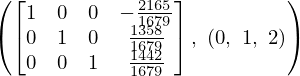

In [28]:
M_rref = M.rref(); M_rref # .rref() is the SymPy method for row reduced echlon form

Take out the first element, i.e. the rref matrix.

In [29]:
M_rref = np.array(M_rref[0]);M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

If you don't like see fractions, convert it into float type.

In [30]:
M_rref.astype(float)

array([[ 1.   ,  0.   ,  0.   , -1.289],
       [ 0.   ,  1.   ,  0.   ,  0.809],
       [ 0.   ,  0.   ,  1.   ,  0.859]])

The last column of the rref matrix is the solution of the system.

## <font face="gotham" color="purple"> Example: rref and Visualization

Let's use ```.rref()``` method to quickly compute a solution of a system then visualize. Consider the system:

\begin{align}
3x+6y+2z&=-13\\
x+2y+z&=-5\\
-5x-10y-2z&=19
\end{align}

Extract the augmented matrix into a SymPy matrix:

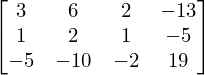

In [31]:
A = sy.Matrix([[3, 6, 2, -13], [1, 2, 1, -5], [-5, -10, -2, 19]]);A

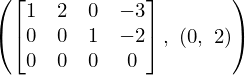

In [32]:
A_rref = A.rref(); A_rref

Now you understand the second element, i.e. $(0, 2)$ which are the numbers of pivot columns in the augmented matrix.

The general solutions is 
\begin{align}
x + 2y & = -3\\
z &= -2\\
y &= free
\end{align}
Let's pick 3 different values of $y$, for instance $(3, 5, 7)$, to calculate $3$ special solutions:

In [33]:
point1 = (-2*3-3, 3, -2)
point2 = (-2*5-3, 5, -2)
point3 = (-2*7-3, 7, -2)
spe_sol = np.array([point1, point2, point3]); spe_sol # each row is a special solution

array([[ -9,   3,  -2],
       [-13,   5,  -2],
       [-17,   7,  -2]])

We can visualize the general solution, and the 3 specific solutions altogether.

In [34]:
y = np.linspace(2, 8, 20)
x = -3 - 2*y
z = np.full((len(y), ), -2)

Text(0.5, 0.92, 'General Solution and Special Solution of the Linear Sytem')

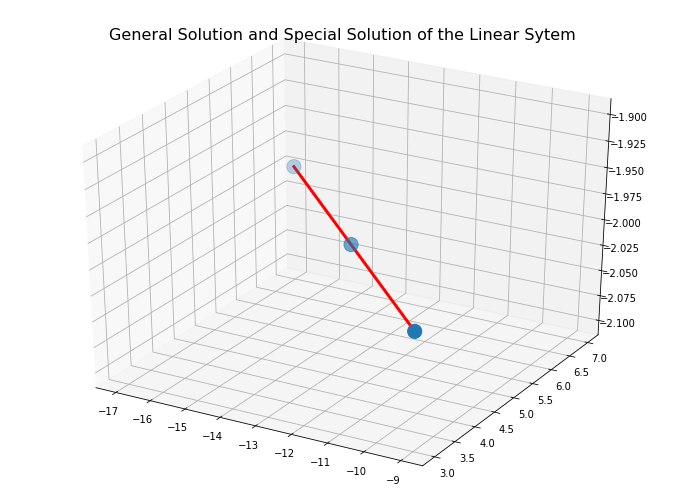

In [110]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw = 3, color = 'red')
ax.scatter(spe_sol[:,0], spe_sol[:,1], spe_sol[:,2], s = 200)
ax.set_title('General Solution and Special Solution of the Linear Sytem', size= 16)

## <font face="gotham" color="purple"> Example: A Symbolic Solution

Consider a system where all right-hand side values are indeterminate:

\begin{align}
x + 2y - 3z &= a\\
4x - y + 8z &= b\\
2x - 6y - 4z &= c
\end{align}

We define $a, b, c$ as SymPy objects, then extract the augmented matrix

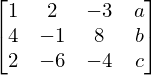

In [35]:
a, b, c = sy.symbols('a, b, c', real = True)
A = sy.Matrix([[1, 2, -3, a], [4, -1, 8, b], [2, -6, -4, c]]); A

We immediately could achieve the symbolic solution by using ```.rref()``` method.

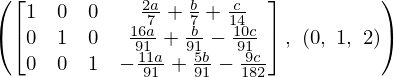

In [37]:
A_rref = A.rref(); A_rref

Of course, we can substitute values to get a specifice solution. 

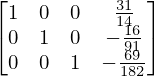

In [38]:
vDict = {a: 3, b: 6, c: 7}
A_rref = A_rref[0].subs(vDict);A_rref # define a dictionary for special values to substitute in

## <font face="gotham" color="purple"> Example: Polynomials

Consider this question : How to find a cubic polynomial that passes through each of these points $(1,3)$,$(2, -2)$ ,$(3, -5)$, and $(4, 0)$.

The form of cubic polynomial is 

\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3
\end{align}
We substitute all the points:

\begin{align}
(x,y)&=(1,3)\qquad\longrightarrow\qquad \ 2=a_0+3a_1+9a_2 +27a_3 \\
(x,y)&=(2,-2)\qquad\longrightarrow\qquad 3=a_0+a_1+a_2+a_3\\
(x,y)&=(3,-5)\qquad\longrightarrow\qquad 2=a_0-4a_1+16a_2-64a_3\\
(x,y)&=(4,0)\qquad\longrightarrow\qquad -2=a_0+2a_1+4a_2+8a_3
\end{align}

Now we get a linear system, the rest should be familiar already.

The augmented matrix is 

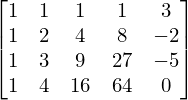

In [39]:
A = sy.Matrix([[1, 1, 1, 1, 3], [1, 2, 4, 8, -2], [1, 3, 9, 27, -5], [1, 4, 16, 64, 0]]); A

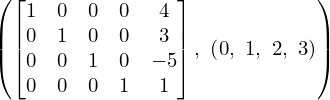

In [43]:
A_rref = A.rref(); A_rref

In [44]:
A_rref = np.array(A_rref[0]); A_rref

array([[1, 0, 0, 0, 4],
       [0, 1, 0, 0, 3],
       [0, 0, 1, 0, -5],
       [0, 0, 0, 1, 1]], dtype=object)

The last column is the solution, i.e. the coefficients of the cubic polynomial.

In [46]:
poly_coef = A_rref.astype(float)[:,-1]; poly_coef

array([ 4.,  3., -5.,  1.])

Cubic polynomial form is:
\begin{align}
y = 4 + 3x - 5x^2 + x^3
\end{align}

Since we have the specific form of the cubic polynomial, we can plot it

In [48]:
x = np.linspace(-5, 5, 40)
y = poly_coef[0] + poly_coef[1]*x + poly_coef[2]*x**2 + poly_coef[3]*x**3

<IPython.core.display.Javascript object>


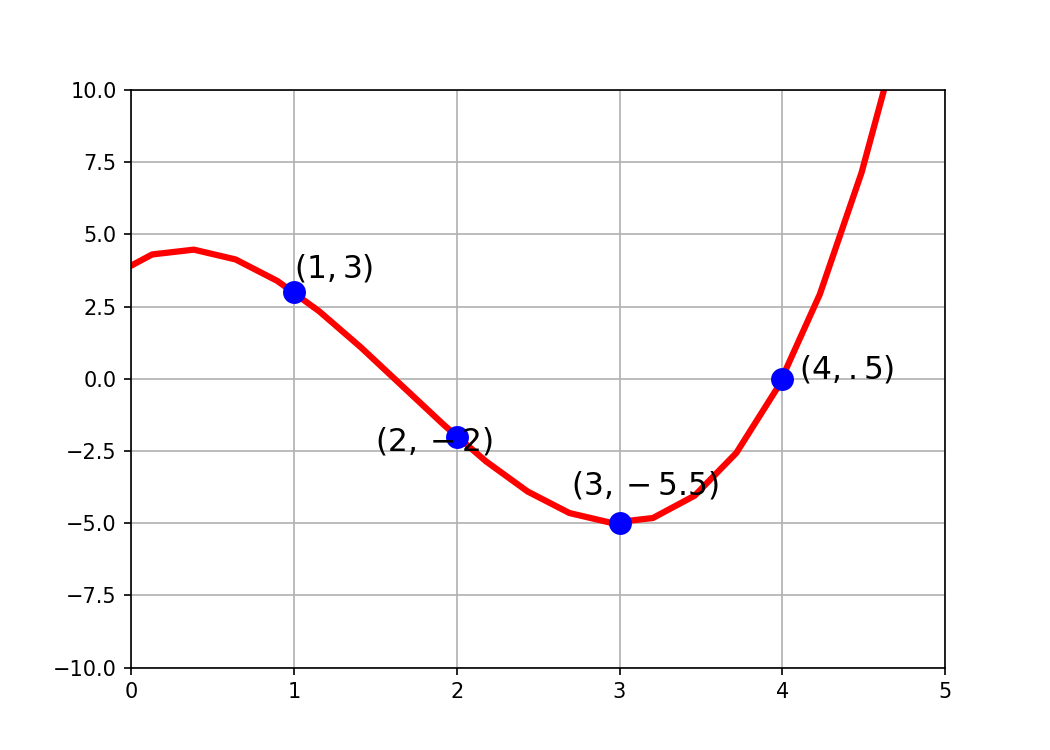

Text(4.1, 0, '$(4, .5)$')

In [52]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(x, y, lw = 3, color ='red')
ax.scatter([1, 2, 3, 4], [3, -2, -5, 0], s = 100, color = 'blue', zorder = 3)
ax.grid()
ax.set_xlim([0, 5])
ax.set_ylim([-10, 10])

ax.text(1, 3.5, '$(1, 3)$', fontsize = 15)
ax.text(1.5, -2.5, '$(2, -2)$', fontsize = 15)
ax.text(2.7, -4, '$(3, -5.5)$', fontsize = 15)
ax.text(4.1, 0, '$(4, .5)$', fontsize = 15)

Try another 5 points: $(1,2)$, $(2,5)$, $(3,8)$, $(4,6)$, $(5, 9)$.And polynomial form is 
\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4
\end{align}

The augmented matrix is

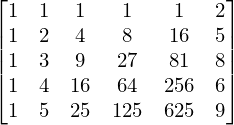

In [53]:
A = sy.Matrix([[1, 1, 1, 1, 1, 2],
               [1, 2, 4, 8, 16, 5], 
               [1, 3, 9, 27, 81, 8], 
               [1, 4, 16, 64, 256, 6], 
               [1, 5, 25,125, 625, 9]]); A

In [54]:
A_rref = A.rref()
A_rref = np.array(A_rref[0])
coef = A_rref.astype(float)[:,-1];coef

array([ 19.   , -37.417,  26.875,  -7.083,   0.625])

In [55]:
x = np.linspace(0, 6, 100)
y = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 + coef[4]*x**4

<IPython.core.display.Javascript object>


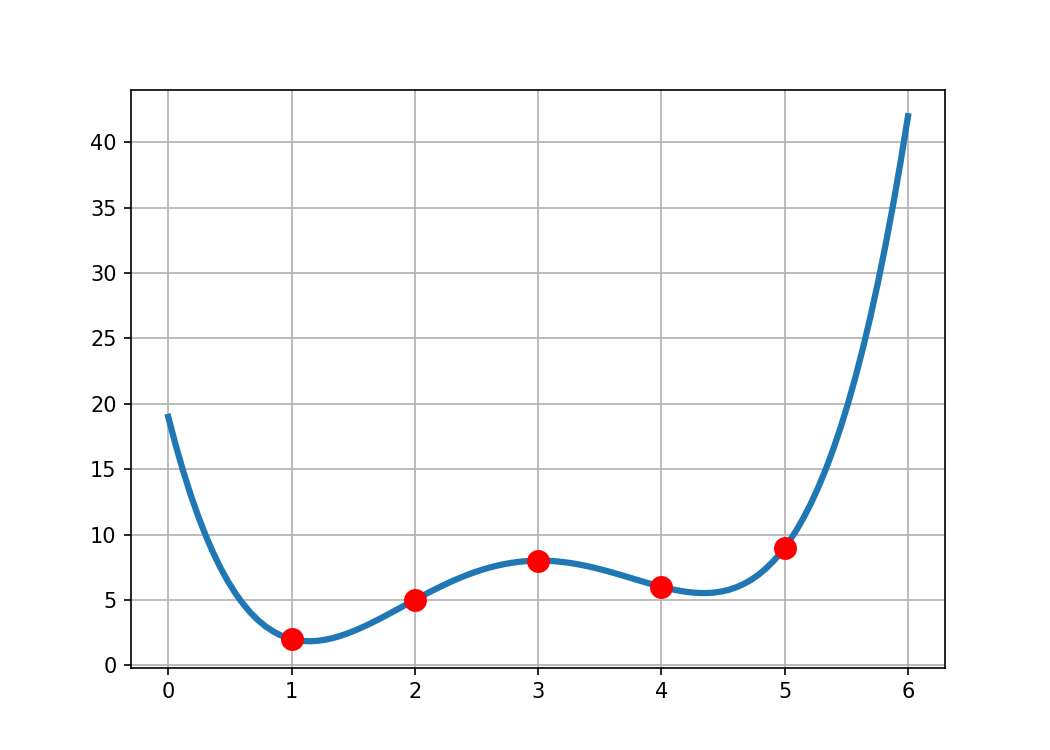

In [58]:
fig, ax = plt.subplots(figsize= (7, 5))
ax.plot(x, y, lw =3)
ax.scatter([1, 2, 3, 4, 5], [2, 5, 8, 6, 9], s= 100, color = 'red', zorder = 3)
ax.grid()

# <font face="gotham" color="purple"> Solve The System of Linear Equations By NumPy

Set up the system $\pmb A  x =  b$, generate a random $\pmb A$ and $b$

In [59]:
A = np.round(10 * np.random.rand(5, 5))
b = np.round(10 * np.random.rand(5,))

In [60]:
x = np.linalg.solve(A, b);x

array([-5.008,  6.524,  4.692, -4.702,  1.644])

Let's verify if $\pmb Ax = b$

In [61]:
A@x - b

array([ 0., -0.,  0., -0.,  0.])

They are technically zeros, due to some round-off errors omitted, that's why there is $-0.$